<a href="https://colab.research.google.com/github/SalNel97/qmss_python_hw3/blob/main/sne2114_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QMSS S5073**
# ***Homework 3***
**Salah El-Sadek (sne2114)**

---

#**Data Preparation**

In [289]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)

# Importing relevant libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.pipeline import make_pipeline



*First, import the red wine csv file into a pandas dataframe from the following website:*

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

*(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')*

*Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:*

In [290]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##**Question 1**

*Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)*

**Scaling data and looking at their scatter plot.**

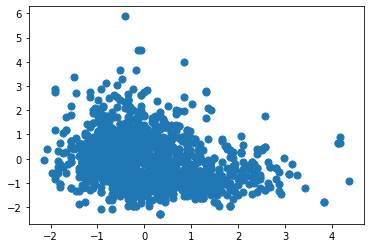

In [291]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50);

**No clear separation of groups or 'clusters' seen visually. Further exploration with K-Means clustering.**

**Evaluating K using elbow chart of K values ranging from 2 to 20.**

Text(0.5, 1.0, 'Elbow curve')

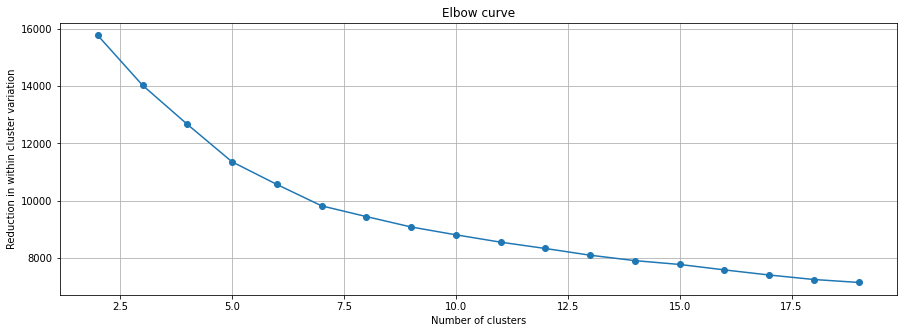

In [292]:
from sklearn.cluster import KMeans

within_cluster_variance = []

# Using the range of k=2 to k=20
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve') 

**No sharply defined elbow so we will approximate the ideal K value to be either 3 or 4.**

###**K = 3**

In [293]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X)

X['cluster'] = km3.labels_
display(X.groupby('cluster').mean())
pd.Series(km3.labels_).value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.646544,0.501291,-0.783764,-0.228483,-0.171032,-0.260539,-0.371498,-0.425494,0.620381,-0.320930,0.029444,-0.160536
1,-0.064045,0.050084,0.099918,0.361867,-0.002867,1.024745,1.267761,0.296404,-0.171839,-0.181772,-0.546743,-0.437077
2,0.945322,-0.733277,1.008401,0.036195,0.239164,-0.432930,-0.467475,0.359844,-0.726336,0.585427,0.382773,0.561007


0    701
2    506
1    392
dtype: int64

###**K = 4**

In [294]:
km4 = KMeans(n_clusters=4, n_init=20)
km4.fit(X)

X['cluster'] = km4.labels_
display(X.groupby('cluster').mean())
pd.Series(km4.labels_).value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
1,-0.646544,0.501291,-0.783764,-0.228483,-0.171032,-0.260539,-0.371498,-0.425494,0.620381,-0.320930,0.029444,-0.160536
2,0.996430,-0.776359,1.000406,0.061747,-0.078746,-0.452588,-0.519599,0.370153,-0.669102,0.398460,0.456534,0.614104
3,-0.065062,0.049038,0.097297,0.363770,-0.012797,1.025623,1.266062,0.296548,-0.169112,-0.187698,-0.545446,-0.436179


1    701
2    478
3    391
0     29
dtype: int64

**Seems like k = 3 is the appropriate number of clusters according to K means evaluation.**

###**1.2**

*Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.*

**Alcohol, sulphate, chlorides, citric acid, and fixed acidity levels are all variables associated with high wine quality (positive in the the cluster with the positive wine quality, and negative in the clusters for low wine quality).**

**Total sulfur dioxide, free sulfur dioxide, and volatile acidity levels are all variables associated with low wine quality (positive in the the clusters with low wine quality, and negative in the cluster for high wine quality).**

**Residual sugar levels, pH, and density do not seem to be conclusive in being specifically clustered with the high quality cluster or the low quality clusters.**

*If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?*

**It seems like having higher alcohol levels in the red wine along with higher citric acid/fixed acid levels while keeping sulfur dioxide levels low should produce a high quality red wine**

**This makes sense since sulfur dioxides are usually added to wines in the winemaking process to preserve the wine and protect it from oxidation and undesirable bacteria/yeasts, and so their status as a preservative probably does not contribute to taste quality.**

**On the other hand, citric acid is more of a flavor component in wines and it makes sense that more acidic or 'citrusy' are perceived as more tasteful.**

#**Question 2**

*Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.*

In [295]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
ac.fit(X)

X['cluster'] = ac.labels_
display(X.groupby('cluster').mean())
pd.Series(ac.labels_).value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.010636,0.002488,-0.009363,-0.110760,-0.019253,-0.046203,-0.047466,-0.022038,0.007227,-0.003441,0.011494,0.010909
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
2,-0.417763,-0.079303,0.208095,4.309152,0.193589,1.778740,1.831599,0.819306,-0.148137,-0.152837,-0.399389,-0.354288


0    1557
2      40
1       2
dtype: int64

**We do not focus on cluster with the small single-digit number of observations.Given the number of observtions in each clusters, our hierchical model seems to suggest k=2 clusters or maybe even no clusters at all (all data is just one cluster).**

*Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.*

**Alcohol levels, pH, fixed acidity levels, and volatile acidity levels are all variables associated with high wine quality.**

**Citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and density are all variables associated with low wine quality.**

**Sulphates levels were inconclusive in determining wine quality.**

###**Dendogram**

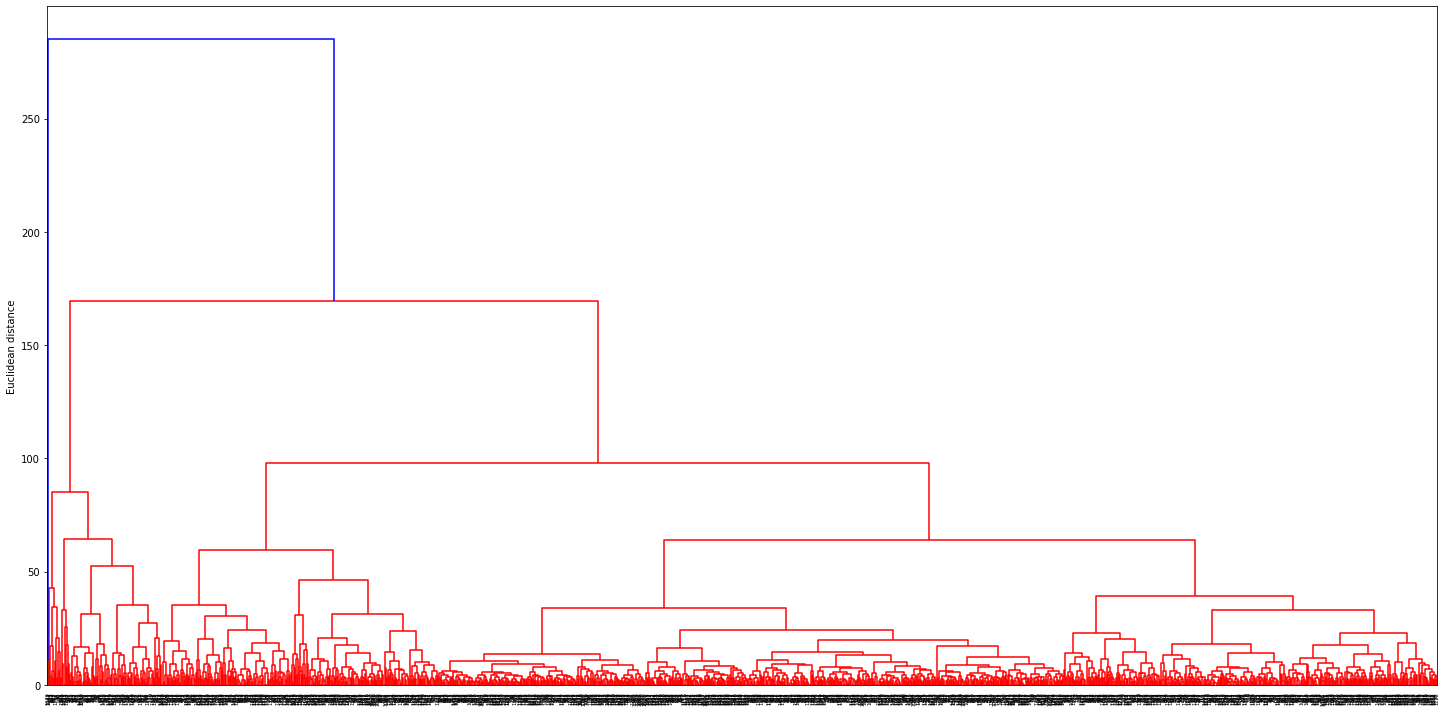

In [296]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(20, 10))

row_clusters = linkage(df.values, method='complete', metric='euclidean')

row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

###**Heat Map**

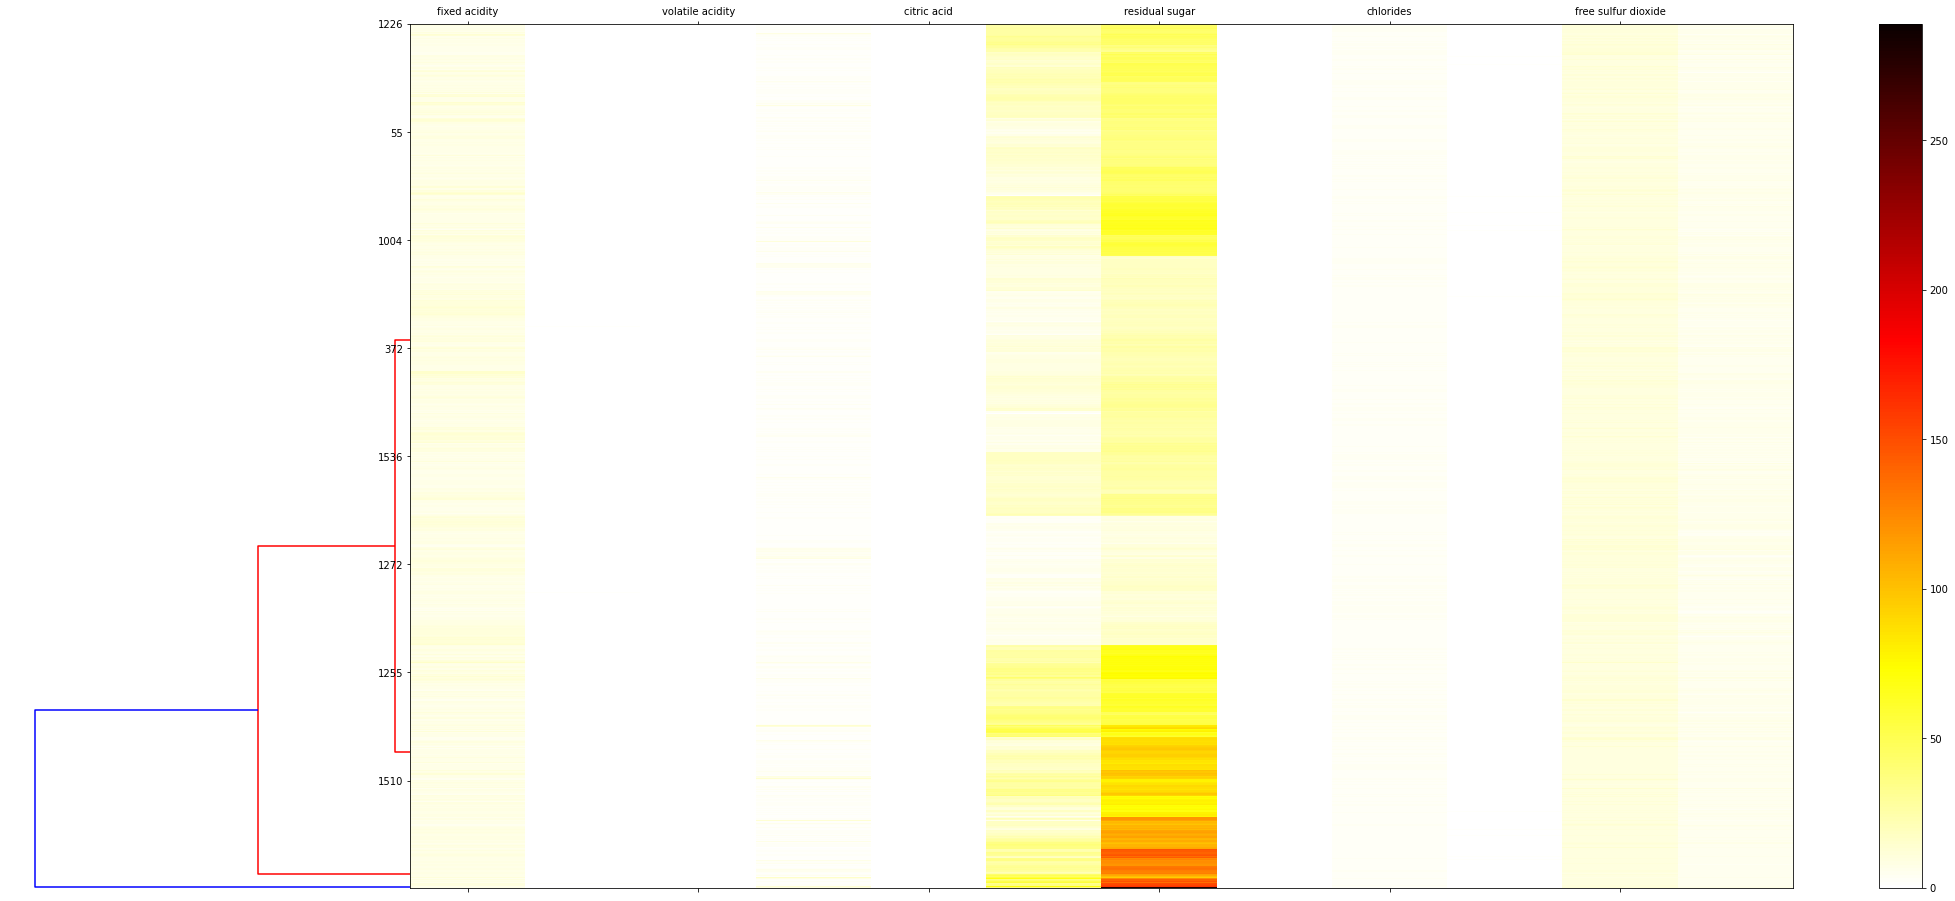

In [297]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

axm.set_aspect('auto')
plt.show()

###**2.3**

*If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.*

**Our hierarchical model is in agreement with k means clustering in terms of alcohol levels and fixed acidity levels being associated with high quality red wine while free and total sulphur dioxide levels are associated with low quality wines.**

**However, the  hierarchical model disputes the notion that chloride levels, volatile acidity levels, and citric acid levels are associated with high quality wines and shows they are clustered with lower quality wines instead.**

**And while residual sugars levels and pH levels were inconclusive in the K-Means clustering model, they were both clustered with low quality wines and high quality wines, respectively.**

**From our heat map (with clusters 0, 1, and 2 from top to bottom, respectively) we can see that residual sugar levels seems to be the most important characteristic in making a good bottle of wine, as it is heavily clustered in the low wine quality cluster (cluster 2: blue line in tree).**

**Increasing alcohol levels and fixed acidity levels while reducing free and total sulphur levels seem to also be important characteristics to consider in making a good bottle of wine, given both clustering models' agreement on the effect of those variables on red wine quality.**

#**Question 3**

*Use Principal Components Analysis to reduce the dimensions of your data.*

In [298]:
df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [299]:
df.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [300]:
from sklearn.decomposition import PCA

PCA().fit(X).components_.T # We have 13 components

array([[ 0.48743642, -0.00885608, -0.16566914, -0.22756064, -0.09337137,
         0.0391673 , -0.31455874,  0.19231231, -0.15881806, -0.18541334,
        -0.24603238,  0.62737349, -0.15225956],
       [-0.26464632,  0.33583176, -0.23149861,  0.03340465,  0.28873933,
         0.26235039, -0.64998117,  0.1304858 , -0.04543131,  0.15297243,
         0.38100492,  0.00743328,  0.00933349],
       [ 0.47307075, -0.13734983,  0.10070051, -0.0515609 , -0.12104316,
         0.14590998,  0.22658212,  0.30892724, -0.21601466,  0.34399812,
         0.62506879, -0.07817621, -0.00193816],
       [ 0.14105235,  0.17789582,  0.25763746, -0.40207397,  0.68795072,
         0.11192316,  0.25165936, -0.14780992,  0.24500019, -0.04641575,
         0.06726057,  0.09041632, -0.27304755],
       [ 0.19770628,  0.18741808, -0.03529039,  0.64376212,  0.29439618,
         0.34574674,  0.20698727, -0.16358719, -0.43342548, -0.00455936,
        -0.20827527,  0.05269816, -0.01621953],
       [-0.04447053,  0.267484

In [301]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=X.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
fixed acidity,0.487436,-0.008856,-0.165669,-0.227561,-0.093371,0.039167,-0.314559,0.192312,-0.158818,-0.185413,-0.246032,0.627373,-0.152260
volatile acidity,-0.264646,0.335832,-0.231499,0.033405,0.288739,0.262350,-0.649981,0.130486,-0.045431,0.152972,0.381005,0.007433,0.009333
citric acid,0.473071,-0.137350,0.100701,-0.051561,-0.121043,0.145910,0.226582,0.308927,-0.216015,0.343998,0.625069,-0.078176,-0.001938
residual sugar,0.141052,0.177896,0.257637,-0.402074,0.687951,0.111923,0.251659,-0.147810,0.245000,-0.046416,0.067261,0.090416,-0.273048
chlorides,0.197706,0.187418,-0.035290,0.643762,0.294396,0.345747,0.206987,-0.163587,-0.433425,-0.004559,-0.208275,0.052698,-0.016220
free sulfur dioxide,-0.044471,0.267484,0.604687,-0.011734,-0.183518,-0.051834,-0.143475,-0.014812,-0.314666,-0.587036,0.236549,-0.061335,-0.013300
total sulfur dioxide,0.005573,0.370259,0.526797,-0.005882,-0.239020,0.108990,-0.120694,0.088060,0.118406,0.590352,-0.355425,0.066692,-0.026195
density,0.370865,0.327121,-0.172730,-0.203856,0.187975,-0.437114,-0.118076,0.084018,-0.247956,0.042546,-0.231469,-0.519558,0.223256
pH,-0.432607,-0.062035,0.074438,-0.011605,0.249136,-0.478641,0.184293,0.331511,-0.456159,0.204646,0.001195,0.332455,-0.088371
sulphates,0.254334,-0.108443,0.207444,0.557677,0.224732,-0.414963,-0.213690,0.252652,0.467211,-0.070948,0.097386,0.061724,-0.026624


In [302]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.779580,1.136114,-1.403243,-0.067327,0.237271,-0.982668,-0.066465,0.035347,-0.283446,0.070317,-0.253571,0.080185,0.068265
1,-1.000384,2.065334,-0.045951,0.483313,0.152486,0.588368,-1.404995,-0.223314,0.596741,-0.562819,0.038724,-0.168307,-0.049001
2,-0.914605,1.377815,-0.733027,0.342508,0.097073,0.222091,-0.720803,-0.122606,0.553729,-0.159610,-0.203081,-0.119780,0.021628
3,2.401698,-0.228493,0.047983,-0.829350,-1.558704,-0.109887,0.235721,-0.197892,-0.501571,0.237322,-0.096081,0.331345,-0.034004
4,-1.779580,1.136114,-1.403243,-0.067327,0.237271,-0.982668,-0.066465,0.035347,-0.283446,0.070317,-0.253571,0.080185,0.068265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.240305,0.611909,0.771306,0.470274,-0.316449,0.142476,0.274519,0.158065,-0.421111,-1.018315,0.307700,-0.083798,-0.051499
1595,-2.120911,-0.335102,2.129075,0.497445,0.051466,-0.782399,-0.429415,0.181173,-0.402402,-0.994427,0.459106,-0.262015,-0.007795
1596,-1.366360,-0.497249,1.249535,0.531901,0.179054,-0.565539,-0.178984,-0.122134,-0.109449,-0.752489,0.226401,-0.409970,0.056654
1597,-2.365116,0.717193,0.871273,0.686779,0.006321,-0.807479,0.136290,0.616214,-0.357983,-0.726900,0.736078,0.005321,-0.081303


*How much of the variation in your data is explained by the first two principal components?*

In [303]:
# Standard deviation of all 13 principal components
np.sqrt(pca.explained_variance_)

array([1.76745583, 1.50038965, 1.30280662, 1.10490817, 0.99470517,
       0.81468273, 0.79041182, 0.7130426 , 0.64382731, 0.57287817,
       0.42568915, 0.24955704, 0.20134139])

In [304]:
# Explained variance of each of the 13 princicpal components
pca.explained_variance_

array([3.12390011, 2.2511691 , 1.6973051 , 1.22082205, 0.98943838,
       0.66370795, 0.62475084, 0.50842975, 0.41451361, 0.3281894 ,
       0.18121125, 0.06227871, 0.04053835])

In [305]:
# Proportion of variance explained for each of the 13 principal components
pca.explained_variance_ratio_

array([0.25804018, 0.18595091, 0.14020068, 0.10084226, 0.08172952,
       0.05482356, 0.05160563, 0.04199728, 0.03423962, 0.02710908,
       0.0149684 , 0.00514434, 0.00334855])

**It seems like our first 2 principal components contribute 0.2593 + 0.1856 = 0.4449 ~ 44.5% of variation in data accounted for by the first 2 principal components. This can also be seen in the figure below on the 'cumulative' curve when 'Principal Component' is equal to 2. 44.5% does not seem sufficient in terms of accounting for variation, since we are aiming around the >70% range.**

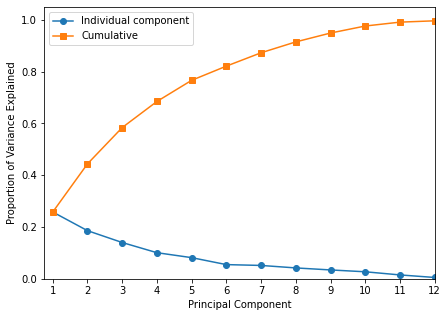

In [306]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc=2);

**We see that we can explain ~80% of the variation in our data with only the first 5-6 principal components.**

*How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?*

**Given that the first two components refer to the plane closest to our observations (closest in terms of average squared Euclidean distance of the plane from the observations), what we basically did was reduce the dimensions of our data to the variables that explain around 45% of our data. We could take our transformed X data (with reduced number of dimensions/variables) and then fit, train, and test them using supervised learning methods (classifier or regressor methods depending on whether said other variable (e.g. wine price) is a categorical or continuous outcome variable.**